# Exploring Neural Audio Synthesis with NSynth

## Parag Mital

There is a lot to explore with NSynth.  This notebook explores just a taste of what's possible including how to encode and decode, timestretch, and interpolate sounds.  Also check out the [blog post](https://magenta.tensorflow.org/nsynth-fastgen) for more examples including two compositions created with Ableton Live.  If you are interested in learning more, checkout my [online course on Kadenze](https://www.kadenze.com/programs/creative-applications-of-deep-learning-with-tensorflow) where we talk about Magenta and NSynth in more depth.

## Part 1: Encoding and Decoding

We'll walkthrough using the source code to encode and decode some audio.  This is the most basic thing we can do with NSynth, and it will take at least about 6 minutes per 1 second of audio to perform on a GPU, though this will get faster!

I'll first show you how to encode some audio.  This is basically saying, here is some audio, now put it into the trained model.  It's like the encoding of an MP3 file.  It takes some raw audio, and represents it using some really reduced down representation of the raw audio.  NSynth works similarly, but we can actually mess with the encoding to do some awesome stuff.  You can for instance, mix it with other encodings, or slow it down, or speed it up.  You can potentially even remove parts of it, mix many different encodings together, and hopefully just explore ideas yet to be thought of.  After you've created your encoding, you have to just generate, or decode it, just like what an audio player does to an MP3 file.

First, to install Magenta, follow their setup guide here: https://github.com/tensorflow/magenta#installation - then import some packages:

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

def load_encoding(fname, sample_length=None, sr=16000, ckpt='models/model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

Now we'll load up a sound I downloaded from freesound.org.  The `utils.load_audio` method will resample this to the required sample rate of 16000.  I'll load in 40000 samples of this beat which should end up being a pretty good loop:

In [7]:
# from https://www.freesound.org/people/MustardPlug/sounds/395058/
fname = '395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav'
sr = 16000
audio = utils.load_audio(fname, sample_length=40000, sr=sr)
sample_length = audio.shape[0]
print('{} samples, {} seconds'.format(sample_length, sample_length / float(sr)))

40000 samples, 2.5 seconds


## Encoding

We'll now encode some audio using the pre-trained NSynth model (download from: http://download.magenta.tensorflow.org/models/nsynth/wavenet-ckpt.tar).  This is pretty fast, and takes about 3 seconds per 1 second of audio on my NVidia 1080 GPU.  This will give us a 125 x 16 dimension encoding for every 4 seconds of audio which we can then decode, or resynthesize.  We'll try a few things, including just leaving it alone and reconstructing it as is.  But then we'll also try some fun transformations of the encoding and see what's possible from there.

```help(fastgen.encode)
Help on function encode in module magenta.models.nsynth.wavenet.fastgen:

encode(wav_data, checkpoint_path, sample_length=64000)
    Generate an array of embeddings from an array of audio.
      Args:
        wav_data: Numpy array [batch_size, sample_length]
        checkpoint_path: Location of the pretrained model.
        sample_length: The total length of the final wave file, padded with 0s.
      Returns:
        encoding: a [mb, 125, 16] encoding (for 64000 sample audio file).
```

In [10]:
%time encoding = fastgen.encode(audio, 'model/model.ckpt-200000', sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
CPU times: user 34.4 s, sys: 2.15 s, total: 36.5 s
Wall time: 17.9 s


This returns a 3-dimensional tensor representing the encoding of the audio.  The first dimension of the encoding represents the batch dimension.  We could have passed in many audio files at once and the process would be much faster.  For now we've just passed in one audio file.

In [11]:
print(encoding.shape)

(1, 78, 16)


We'll also save the encoding so that we can use it again later:

In [13]:
np.save(fname + '.npy', encoding)

Let's take a look at the encoding of this audio file.  Think of these as 16 channels of sounds all mixed together (though with a lot of caveats):

Text(0.5,1,'NSynth Encoding')

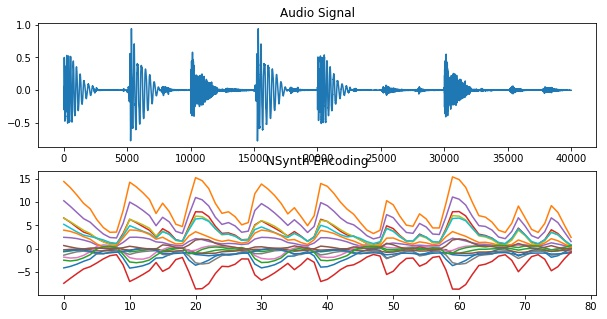

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].plot(audio);
axs[0].set_title('Audio Signal')
axs[1].plot(encoding[0]);
axs[1].set_title('NSynth Encoding')

You should be able to pretty clearly see a sort of beat like pattern in both the signal and the encoding.

## Decoding

Now we can decode the encodings as is.  This is the process that takes awhile, though it used to be so long that you wouldn't even dare trying it.  There is still plenty of room for improvement and I'm sure it will get faster very soon.

```
help(fastgen.synthesize)
Help on function synthesize in module magenta.models.nsynth.wavenet.fastgen:

synthesize(encodings, save_paths, checkpoint_path='model.ckpt-200000', samples_per_save=1000)
    Synthesize audio from an array of embeddings.
      Args:
        encodings: Numpy array with shape [batch_size, time, dim].
        save_paths: Iterable of output file names.
        checkpoint_path: Location of the pretrained model. [model.ckpt-200000]
        samples_per_save: Save files after every amount of generated samples.
```        

In [15]:
%time fastgen.synthesize(encoding, save_paths=['gen_' + fname], samples_per_save=sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 290

INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tensorflow:Sample: 30100
INFO:tensorflow:Sample: 30200
INFO:tensorflow:Sample: 30300
INFO:tensorflow:Sample: 30400
INFO:tensorflow:Sample: 30500
INFO:tenso

After it's done synthesizing, we can see that takes about 6 minutes per 1 second of audio on a non-optimized version of Tensorflow for GPU on an NVidia 1080 GPU.  We can speed things up considerably if we want to do multiple encodings at a time.  We'll see that in just a moment.  Let's first listen to the synthesized audio:

In [17]:
sr = 16000
synthesis = utils.load_audio('gen_' + fname, sample_length=sample_length, sr=sr)

Listening to the audio, the sounds are definitely different.  NSynth seems to apply a sort of gobbly low-pass  that also really doesn't know what to do with the high frequencies.  It is really quite hard to describe, but that is what is so interesting about it.  It has a recognizable, characteristic sound.

Let's try another one.  I'll put the whole workflow for synthesis in two cells, and we can listen to another synthesis of a vocalist singing, "Laaaa":

In [22]:
# from https://www.freesound.org/people/maurolupo/sounds/213259/
fname = '213259__maurolupo__girl-sings-laa.wav'
sample_length = 32000
audio, encoding = load_encoding(fname, sample_length)
fastgen.synthesize(
    encoding,
    save_paths=['gen_' + fname],
    samples_per_save=sample_length)
synthesis = utils.load_audio('gen_' + fname,
                             sample_length=sample_length,
                             sr=sr)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_213259__maurolupo__girl-sings-laa.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflo

INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:Sample: 27300
INFO:tensorflow:Sample: 27400
INFO:tensorflow:Sample: 27500
INFO:tensorflow:Sample: 27600
INFO:tensorflow:Sample: 27700
INFO:tensorflow:Sample: 27800
INFO:tensorflow:Sample: 27900
INFO:tensorflow:Sample: 28000
INFO:tensorflow:Sample: 28100
INFO:tensorflow:Sample: 28200
INFO:tensorflow:Sample: 28300
INFO:tensorflow:Sample: 28400
INFO:tensorflow:Sample: 28500
INFO:tensorflow:Sample: 28600
INFO:tensorflow:Sample: 28700
INFO:tensorflow:Sample: 28800
INFO:tensorflow:Sample: 28900
INFO:tensorflow:Sample: 29000
INFO:tensorflow:Sample: 29100
INFO:tensorflow:Sample: 29200
INFO:tensorflow:Sample: 29300
INFO:tensorflow:Sample: 29400
INFO:tensorflow:Sample: 29500
INFO:tensorflow:Sample: 29600
INFO:tensorflow:Sample: 29700
INFO:tensorflow:Sample: 29800
INFO:tensorflow:Sample: 29900
INFO:tensorflow:Sample: 30000
INFO:tensorflow:Sample: 30100
INFO:tensorflow:Sample: 30200
INFO:tensorflow:Sample: 30300
INFO:tenso

Aside from the quality of the reconstruction, what we're really after is what is possible with such a model.  Let's look at two examples now.

# Part 2: Timestretching

Let's try something more fun.  We'll stretch the encodings a bit and see what it sounds like.  If you were to try and stretch audio directly, you'd hear a pitch shift.  There are some other ways of stretching audio without shifting pitch, like granular synthesis.  But it turns out that NSynth can also timestretch.  Let's see how.  First we'll use image interpolation to help stretch the encodings.

In [25]:
# use image interpolation to stretch the encoding: (pip install scikit-image)
try:
    from skimage.transform import resize
except ImportError:
    !pip install scikit-image
    from skimage.transform import resize

Here's a utility function to help you stretch your own encoding.  It uses skimage.transform and will retain the range of values.  Images typically only have a range of 0-1, but the encodings aren't actually images so we'll keep track of their min/max in order to stretch them like images.

In [26]:
def timestretch(encodings, factor):
    min_encoding, max_encoding = encoding.min(), encoding.max()
    encodings_norm = (encodings - min_encoding) / (max_encoding - min_encoding)
    timestretches = []
    for encoding_i in encodings_norm:
        stretched = resize(encoding_i, (int(encoding_i.shape[0] * factor), encoding_i.shape[1]), mode='reflect')
        stretched = (stretched * (max_encoding - min_encoding)) + min_encoding
        timestretches.append(stretched)
    return np.array(timestretches)

In [29]:
# from https://www.freesound.org/people/MustardPlug/sounds/395058/
fname = '395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav'
sample_length = 40000
audio, encoding = load_encoding(fname, sample_length)

INFO:tensorflow:Restoring parameters from model.ckpt-200000


Now let's stretch the encodings with a few different factors:

In [30]:
audio = utils.load_audio('gen_slower_' + fname, sample_length=None, sr=sr)
Audio(audio, rate=sr)

In [31]:
encoding_slower = timestretch(encoding, 1.5)
encoding_faster = timestretch(encoding, 0.5)

Basically we've made a slower and faster version of the amen break's encodings.  The original encoding is shown in black:

Text(0.5,1,'Encoding (Slower)')

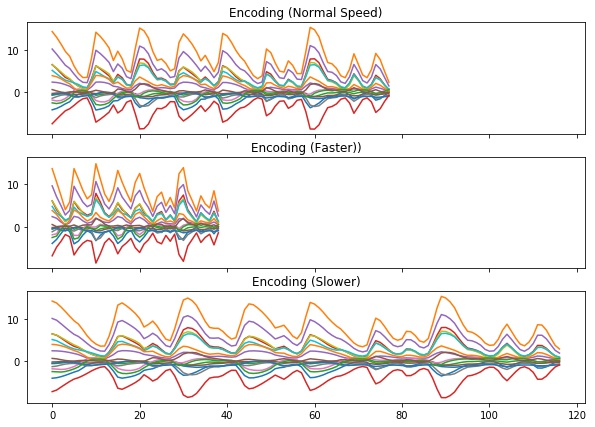

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
axs[0].plot(encoding[0]); 
axs[0].set_title('Encoding (Normal Speed)')
axs[1].plot(encoding_faster[0]);
axs[1].set_title('Encoding (Faster))')
axs[2].plot(encoding_slower[0]);
axs[2].set_title('Encoding (Slower)')

Now let's decode them:

In [ ]:
fastgen.synthesize(encoding_faster, save_paths=['gen_faster_' + fname])
fastgen.synthesize(encoding_slower, save_paths=['gen_slower_' + fname])

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: gen_faster_395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: gen_faster_395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: gen_faster_395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorf

It seems to work pretty well and retains the pitch and timbre of the original sound.  We could even quickly layer the sounds just by adding them.  You might want to do this in a program like Logic or Ableton Live instead and explore more possiblities of these sounds!

# Part 3: Interpolating Sounds

Now let's try something more experimental.  NSynth released plenty of great examples of what happens when you mix the embeddings of different sounds: https://magenta.tensorflow.org/nsynth-instrument - we're going to do the same but now with our own sounds!

First let's load some encodings:

In [8]:
sample_length = 80000

# from https://www.freesound.org/people/MustardPlug/sounds/395058/
aud1, enc1 = load_encoding('input_data/395058__mustardplug__breakbeat-hiphop-a4-4bar-96bpm.wav', sample_length)

# from https://www.freesound.org/people/xserra/sounds/176098/
aud2, enc2 = load_encoding('input_data/176098__xserra__cello-cant-dels-ocells.wav', sample_length)

#aud5, enc5 = load_encoding('input_data/412017__skymary__cat-meow-short.wav', sample_length)

INFO:tensorflow:Restoring parameters from models/model.ckpt-200000
INFO:tensorflow:Restoring parameters from models/model.ckpt-200000


In [39]:
sample_length = 18000

aud3, enc3 = load_encoding('input_data/316920__rudmer-rotteveel__chicken-single-alarm-call.wav', sample_length)
aud4, enc4 = load_encoding('input_data/327666__juan-merie-venter__dog-bark.wav', sample_length)
aud5, enc5 = load_encoding('input_data/333916__thearxx08__cat-meowing.mp3', sample_length)

old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2
old:  2
TARGET_WIDTH:  2


INFO:tensorflow:Restoring parameters from model/model.ckpt-200000
INFO:tensorflow:Restoring parameters from model/model.ckpt-200000


Now we'll mix the two audio signals together.  But this is unlike adding the two signals together in a Ableton or simply hearing both sounds at the same time.  Instead, we're averaging the representation of their timbres, tonality, change over time, and resulting audio signal.  This is way more powerful than a simple averaging.

In [40]:
#enc_mix = (enc1 + enc2) / 2.0
enc_mix = (enc3 + enc4 + enc5) / 3.0

Text(0.5,1,'Average')

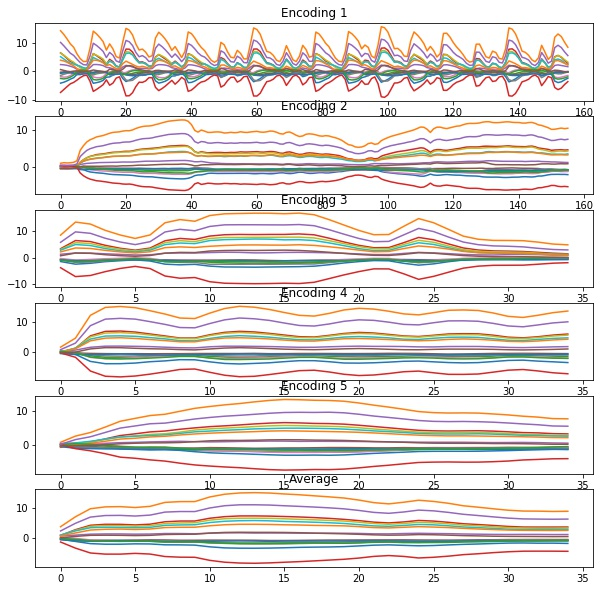

In [42]:
fig, axs = plt.subplots(6, 1, figsize=(10, 10))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(enc3[0]); 
axs[2].set_title('Encoding 3')
axs[3].plot(enc4[0]);
axs[3].set_title('Encoding 4')
axs[4].plot(enc5[0]); 
axs[4].set_title('Encoding 5')
axs[5].plot(enc_mix[0]);
axs[5].set_title('Average')

In [41]:
fastgen.synthesize(enc_mix, checkpoint_path='model/model.ckpt-200000', save_paths=['output_data/mix_2.wav'])

INFO:tensorflow:Restoring parameters from model/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: output_data/mix_2.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: output_data/mix_2.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: output_data/mix_2.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2

As another example of what's possible with interpolation of embeddings, we'll try crossfading between the two embeddings.  To do this, we'll write a utility function which will use a hanning window to apply a fade in or out to the embeddings matrix:

In [8]:
def fade(encoding, mode='in'):
    length = encoding.shape[1]
    fadein = (0.5 * (1.0 - np.cos(3.1415 * np.arange(length) / 
                                  float(length)))).reshape(1, -1, 1)
    if mode == 'in':
        return fadein * encoding
    else:
        return (1.0 - fadein) * encoding

Text(0.5,1,'Fade Out')

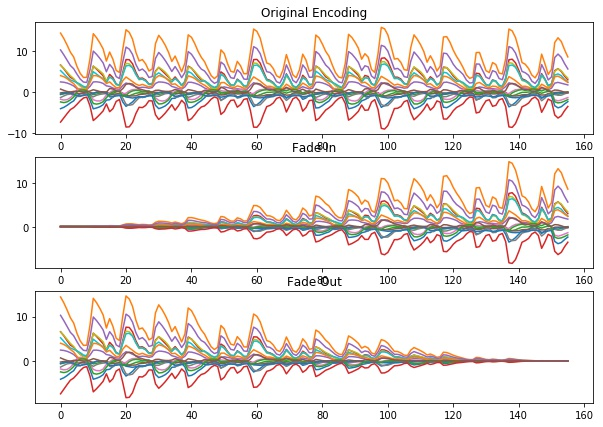

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Original Encoding')
axs[1].plot(fade(enc1, 'in')[0]);
axs[1].set_title('Fade In')
axs[2].plot(fade(enc1, 'out')[0]);
axs[2].set_title('Fade Out')

Now we can cross fade two different encodings by adding their repsective fade ins and out:

In [10]:
def crossfade(encoding1, encoding2):
    return fade(encoding1, 'out') + fade(encoding2, 'in')

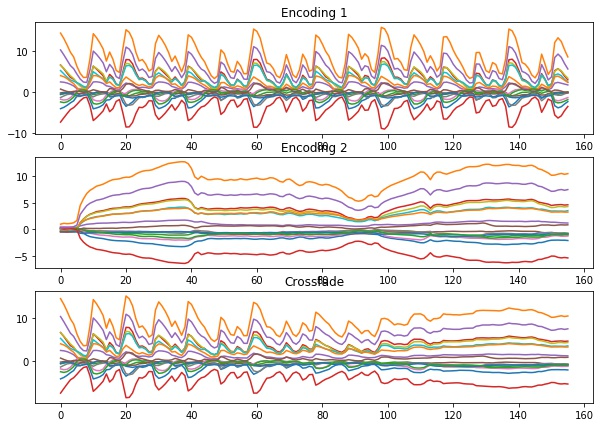

In [63]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
axs[0].plot(enc1[0]); 
axs[0].set_title('Encoding 1')
axs[1].plot(enc2[0]);
axs[1].set_title('Encoding 2')
axs[2].plot(crossfade(enc1, enc2)[0]);
axs[2].set_title('Crossfade')

Now let's synthesize the resulting encodings:

In [11]:
fastgen.synthesize(crossfade(enc1, enc2), save_paths=['crossfade.wav'])

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 28

INFO:tensorflow:Sample: 24400
INFO:tensorflow:Sample: 24500
INFO:tensorflow:Sample: 24600
INFO:tensorflow:Sample: 24700
INFO:tensorflow:Sample: 24800
INFO:tensorflow:Sample: 24900
INFO:tensorflow:Sample: 25000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 25100
INFO:tensorflow:Sample: 25200
INFO:tensorflow:Sample: 25300
INFO:tensorflow:Sample: 25400
INFO:tensorflow:Sample: 25500
INFO:tensorflow:Sample: 25600
INFO:tensorflow:Sample: 25700
INFO:tensorflow:Sample: 25800
INFO:tensorflow:Sample: 25900
INFO:tensorflow:Sample: 26000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 26100
INFO:tensorflow:Sample: 26200
INFO:tensorflow:Sample: 26300
INFO:tensorflow:Sample: 26400
INFO:tensorflow:Sample: 26500
INFO:tensorflow:Sample: 26600
INFO:tensorflow:Sample: 26700
INFO:tensorflow:Sample: 26800
INFO:tensorflow:Sample: 26900
INFO:tensorflow:Sample: 27000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 27100
INFO:tensorflow:Sample: 27200
INFO:tensorflow:

INFO:tensorflow:Sample: 48700
INFO:tensorflow:Sample: 48800
INFO:tensorflow:Sample: 48900
INFO:tensorflow:Sample: 49000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 49100
INFO:tensorflow:Sample: 49200
INFO:tensorflow:Sample: 49300
INFO:tensorflow:Sample: 49400
INFO:tensorflow:Sample: 49500
INFO:tensorflow:Sample: 49600
INFO:tensorflow:Sample: 49700
INFO:tensorflow:Sample: 49800
INFO:tensorflow:Sample: 49900
INFO:tensorflow:Sample: 50000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 50100
INFO:tensorflow:Sample: 50200
INFO:tensorflow:Sample: 50300
INFO:tensorflow:Sample: 50400
INFO:tensorflow:Sample: 50500
INFO:tensorflow:Sample: 50600
INFO:tensorflow:Sample: 50700
INFO:tensorflow:Sample: 50800
INFO:tensorflow:Sample: 50900
INFO:tensorflow:Sample: 51000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 51100
INFO:tensorflow:Sample: 51200
INFO:tensorflow:Sample: 51300
INFO:tensorflow:Sample: 51400
INFO:tensorflow:Sample: 51500
INFO:tensorflow:

INFO:tensorflow:Sample: 73000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 73100
INFO:tensorflow:Sample: 73200
INFO:tensorflow:Sample: 73300
INFO:tensorflow:Sample: 73400
INFO:tensorflow:Sample: 73500
INFO:tensorflow:Sample: 73600
INFO:tensorflow:Sample: 73700
INFO:tensorflow:Sample: 73800
INFO:tensorflow:Sample: 73900
INFO:tensorflow:Sample: 74000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 74100
INFO:tensorflow:Sample: 74200
INFO:tensorflow:Sample: 74300
INFO:tensorflow:Sample: 74400
INFO:tensorflow:Sample: 74500
INFO:tensorflow:Sample: 74600
INFO:tensorflow:Sample: 74700
INFO:tensorflow:Sample: 74800
INFO:tensorflow:Sample: 74900
INFO:tensorflow:Sample: 75000
INFO:tensorflow:Saving: crossfade.wav
INFO:tensorflow:Sample: 75100
INFO:tensorflow:Sample: 75200
INFO:tensorflow:Sample: 75300
INFO:tensorflow:Sample: 75400
INFO:tensorflow:Sample: 75500
INFO:tensorflow:Sample: 75600
INFO:tensorflow:Sample: 75700
INFO:tensorflow:Sample: 75800
INFO:tensorflow:

There is a lot to explore with NSynth.  So far I've just shown you a taste of what's possible when you are able to generate your own sounds.  I expect the generation process will soon get much faster, especially with help from the community, and for more unexpected and interesting applications to emerge.  Please keep in touch with whatever you end up creating, either personally via [twitter](https://twitter.com/pkmital), in our [Creative Applications of Deep Learning](https://www.kadenze.com/programs/creative-applications-of-deep-learning-with-tensorflow) community on Kadenze, or the [Magenta Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/magenta-discuss).